# Compare downloaded PurpleAir and AirNow data

### Load python packages

In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#import time # for epoch timestamp

### Load data

Load csv files of hourly data.

In [2]:
yearval = '2020'

Read PurpleAir data

In [3]:
PA_hourly = pd.read_csv('/Users/buchholz/Desktop/PurpleAir_working/{}/concatenated_stations_{}_PurpleAir_hourly_filtered90perc.csv'.format(yearval,yearval), na_values='NAN', keep_default_na=False)
datetimes_hourly = pd.to_datetime(PA_hourly['Date (US/Pacific Standard Time)'])
PA_hourly.index = datetimes_hourly

In [4]:
# 24 hour average
PA_24hravg = PA_hourly.resample('D').mean()

In [5]:
# Sonoma County regional mean of the daily average
PA_all_station_24hr = PA_24hravg.mean(axis=1)
# Sonoma County regional standard deviation of the daily average
PA_all_station_24std = PA_24hravg.std(axis=1)
# Sonoma County regional standard error of the daily average
PA_all_station_24count = PA_24hravg.count(axis=1)
PA_all_station_24se = PA_all_station_24std/np.sqrt(PA_all_station_24count)

Read AirNow Sebastopol data

In [6]:
Sebastopol_hourly = pd.read_csv('/Users/buchholz/Desktop/AirNow_Working/{}/AirNow_hourly_Sebastopol_{}.csv'.format(yearval,yearval), na_values='NAN', keep_default_na=False)
Sebastopol_date = pd.to_datetime(Sebastopol_hourly['Date (UTC)'] , utc=True)
Sebastopol_hourly.index = Sebastopol_date

In [7]:
# convert UTC to local time
Sebastopol_hourly.index = Sebastopol_hourly.index.tz_convert('Etc/GMT+8')
Sebastopol_hourly.index.name = 'Date (US/Pacific Standard Time)'

In [8]:
# 24 h average
Sebastopol_24hravg = Sebastopol_hourly.resample('D').mean()

### Plot time series of daily average

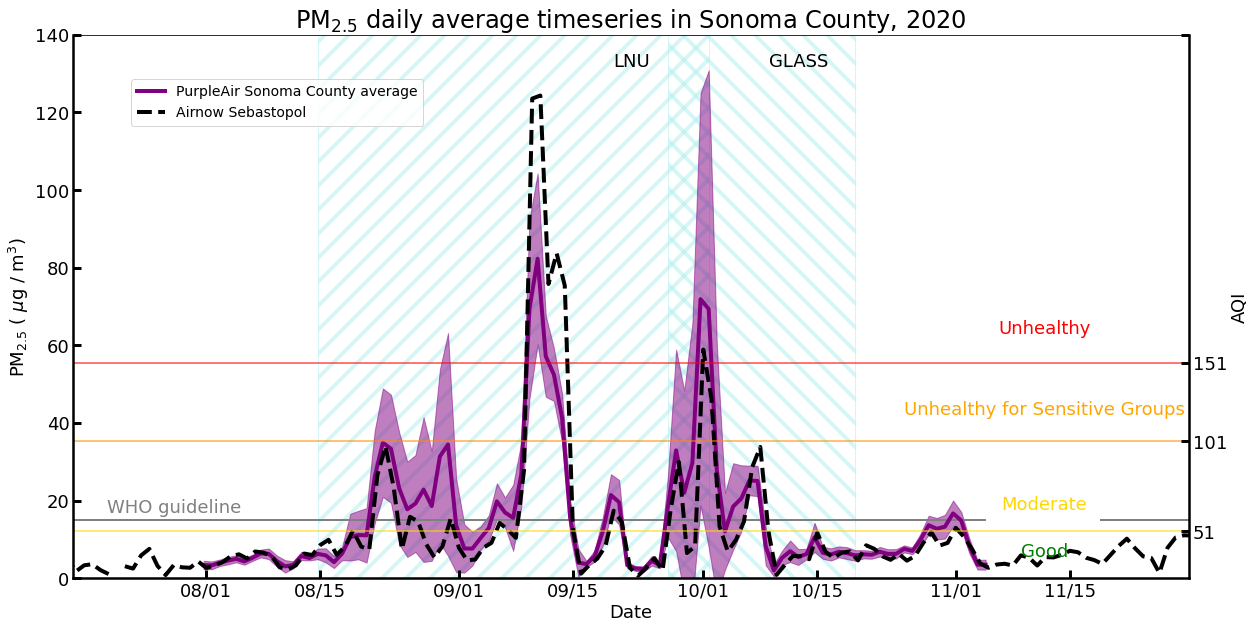

In [9]:
plt.figure(figsize=(20,10))
ax = plt.axes()


# PurpleAir trace
plt.plot(PA_all_station_24hr.index, PA_all_station_24hr, '-', label='PurpleAir Sonoma County average',
         color='purple',
         markersize=12, linewidth=4,
         markerfacecolor='purple',
         markeredgecolor='grey',
         markeredgewidth=1)

plt.fill_between(PA_all_station_24hr.index, PA_all_station_24hr-PA_all_station_24std, PA_all_station_24hr+PA_all_station_24std,
                alpha=0.5, edgecolor='purple', facecolor='purple')


# AirNow trace
plt.plot(Sebastopol_24hravg.index, Sebastopol_24hravg['PM2.5'], '--', label='Airnow Sebastopol',
         color='black',
         markersize=12, linewidth=4,
         markerfacecolor='black',
         markeredgecolor='grey',
         markeredgewidth=1)


# legend
plt.legend(bbox_to_anchor=(0.32, 0.82),fontsize=14,loc='lower right')

# axes format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlim(pd.to_datetime(20200716,format='%Y%m%d'),pd.to_datetime(20201130,format='%Y%m%d'))
ax.set_ylim(0, 140)
#plt.yticks(np.arange(0, 50, step=20), fontsize=18)


# WHO limit
#ax.axhline(y=15, alpha=0.7, color='black')
plt.text(0.09, 0.13, 'WHO guideline', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='grey')
#partial line
plt.hlines(y=15, xmin=pd.to_datetime(20200701,format='%Y%m%d'), xmax=pd.to_datetime(20201105,format='%Y%m%d'), 
           colors='grey', linestyles='-', lw=2)
plt.hlines(y=15, xmin=pd.to_datetime(20201119,format='%Y%m%d'), xmax=pd.to_datetime(20201130,format='%Y%m%d'), 
           colors='grey', linestyles='-', lw=2)


# EPA AQI limits
plt.text(0.87, 0.05, 'Good', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='green')

ax.axhline(y=12.1, alpha=0.7, color='gold')
plt.text(0.87, 0.135, 'Moderate', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='gold')
ax.axhline(y=35.3, alpha=0.7, color='darkorange')
plt.text(0.87, 0.31, 'Unhealthy for Sensitive Groups', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='orange')
ax.axhline(y=55.5, alpha=0.7, color='red')
plt.text(0.87, 0.46, 'Unhealthy', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='red')
#ax.axhline(y=150.5, alpha=0.7, color='purple')
#plt.text(0.8, 0.50, 'Very Unhealthy', horizontalalignment='center',
#     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='purple')
#ax.axhline(y=250.5, alpha=0.7, color='darkred')
#plt.text(0.8, 0.50, 'Hazardous', horizontalalignment='center',
#     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='darkred')


# shade fires
plt.rcParams['hatch.linewidth']=4
ax.axvspan(pd.to_datetime(20200815,format='%Y%m%d'),pd.to_datetime(20201002,format='%Y%m%d'), alpha=0.5, 
           color='paleturquoise', fill=False, hatch='/',zorder=0)
plt.text(0.5, 0.95, 'LNU', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18)
ax.axvspan(pd.to_datetime(20200927,format='%Y%m%d'),pd.to_datetime(20201020,format='%Y%m%d'), alpha=0.5,
           color='paleturquoise', fill=False, hatch='\\', zorder=0)
plt.text(0.65, 0.95, 'GLASS', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18)


# tickmarks direction
ax.tick_params(direction='in', length=8, width=3)

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


# titles
plt.title('PM$_{2.5}$ daily average timeseries in Sonoma County, '+yearval,fontsize=24)
plt.xlabel('Date',fontsize=18)
plt.ylabel('PM$_{2.5}$ ( $\mu$g / m$^3$)',fontsize=18)

#second axis:
ax2 = ax.twinx()
ax2.tick_params(direction='in', length=8, width=3)
ax2.spines["right"].set_linewidth(2.5)
ax2.set_yticks([12.1, 35.3, 55.5, 140])
ax2.set_yticklabels(['51', '101','151', ''], fontsize=18)

plt.ylabel('AQI',fontsize=18)

#plt.show() 
plt.savefig('Timeseries_avg.png')

### Create Sebastopol station and Ag pass region subsets

LNU Ag Pass \
38.722544, -123.036029 (top left) \
38.722544, -122.749469 (top right) \
38.409723, -123.036029 (bottom left) \
38.41006, -122.749411(bottom right)

In [10]:
# determined externally to notebook
LNU_sites = pd.read_csv('LNUzone_monitors.csv', na_values='NAN', keep_default_na=False)

In [11]:
count = 0

for sensor in LNU_sites['sensor_index']:
    #print(sensor)    
    if count == 0:
        #print('collecting first record)
        collect_sites = pd.DataFrame(PA_hourly[str(sensor)])
        collect_sites.index = datetimes_hourly

        count += 1
    else:
        temp = collect_sites
        newdata = pd.DataFrame(PA_hourly[str(sensor)])
        newdata.index = datetimes_hourly
        #collect_sites = pd.concat([temp, newdata], axis=0)
        collect_sites =temp.join(newdata)
        
#print(collect_sites)
PA_LNU_hourly = collect_sites.mean(axis=1)

Glass Ag Pass \
38.473471, -122.643539 (top left) \
38.473346, -122.47189 (top right) \
38.348881, -122.643552 (bottom left) \
38.348881, -122.47189 (bottom right)

In [12]:
# determined externally to notebook
Glass_sites = pd.read_csv('GlassZone_monitors.csv', na_values='', keep_default_na=False)

In [13]:
count = 0

for sensor in Glass_sites['sensor_index']:
    #print(sensor)    
    if count == 0:
        #print('collecting first record)
        collect_sites = pd.DataFrame(PA_hourly[str(sensor)])
        collect_sites.index = datetimes_hourly

        count += 1
    else:
        temp = collect_sites
        newdata = pd.DataFrame(PA_hourly[str(sensor)])
        newdata.index = datetimes_hourly
        #collect_sites = pd.concat([temp, newdata], axis=0)
        collect_sites =temp.join(newdata)
        
#print(collect_sites)
PA_Glass_hourly = collect_sites.mean(axis=1)

Sebastopol station, CA \
38.404 °N, 122.818 °W; +/- 0.05°

In [14]:
# determined externally to notebook
sebastopol_sites = pd.read_csv('SBTzone_monitors.csv', na_values='NAN', keep_default_na=False)

In [15]:
count = 0

for sensor in sebastopol_sites['sensor_index']:
    #print(sensor)    
    if count == 0:
        #print('collecting first record)
        collect_sites = pd.DataFrame(PA_hourly[str(sensor)])
        collect_sites.index = datetimes_hourly

        count += 1
    else:
        temp = collect_sites
        newdata = pd.DataFrame(PA_hourly[str(sensor)])
        newdata.index = datetimes_hourly
        #collect_sites = pd.concat([temp, newdata], axis=0)
        collect_sites =temp.join(newdata)
        
#print(collect_sites)
PA_Sebastopol_hourly = collect_sites.mean(axis=1)

### Calculate daily cycle

2020: \
2020-08-19 to 2020-08-31 \
2020-09-08 to 2020-09-15 \
2020-09-27 to 2020-10-05 


In [16]:
t1 = '2020-09-27'
t2 = '2020-10-05'

Sonoma County

In [17]:
PA_allstation_hourly = pd.DataFrame(PA_hourly.mean(axis=1))
PA_allstation_hourly.index = pd.to_datetime(PA_hourly['Date (US/Pacific Standard Time)'])

In [18]:
PA_subset = PA_allstation_hourly.loc[t1:t2]

In [19]:
hour = PA_subset.index.hour

In [20]:
PA_allstation_diurnal = PA_subset.groupby(hour).mean()
PA_allstation_diurnal_std = PA_subset.groupby(hour).std()
PA_allstation_diurnal_count = PA_subset.groupby(hour).count()
PA_allstation_diurnal_se = PA_allstation_diurnal_std/np.sqrt(PA_allstation_diurnal_count)

AirNow Sebastopol

In [21]:
#Sebastopol_hourly.index = pd.to_datetime(Sebastopol_hourly['Date (UTC)'],format='%Y%m%d %H:%M')
#Sebastopol_hourly = Sebastopol_hourly.tz_localize('UTC')
Sebastopol_hourly.index = Sebastopol_hourly.index.tz_convert('Etc/GMT+8')
Sebastopol_select = Sebastopol_hourly.loc[t1:t2]

In [22]:
an_hour = Sebastopol_select.index.hour

In [23]:
Sebastopol_diurnal = Sebastopol_select.groupby(an_hour).mean()
Sebastopol_diurnal_std = Sebastopol_select.groupby(an_hour).std()
Sebastopol_count = Sebastopol_select.groupby(an_hour).count()
Sebastopol_diurnal_se = Sebastopol_diurnal_std/np.sqrt(Sebastopol_count)

PA at Sebastopol

In [24]:
PA_Sebastopol_subset = PA_Sebastopol_hourly.loc[t1:t2]
PA_sbt_hour = PA_Sebastopol_subset.index.hour
PA_Sebastopol_diurnal = PA_Sebastopol_subset.groupby(PA_sbt_hour).mean()
PA_Sebastopol_diurnal_std = PA_Sebastopol_subset.groupby(PA_sbt_hour).std()
PA_Sebastopol_diurnal_count = PA_Sebastopol_subset.groupby(PA_sbt_hour).count()
PA_Sebastopol_diurnal_se = PA_Sebastopol_diurnal_std/np.sqrt(PA_Sebastopol_diurnal_count)

PA at LNU Ag Pass region

In [25]:
PA_LNU_subset = PA_LNU_hourly.loc[t1:t2]
PA_LNU_hour = PA_LNU_subset.index.hour
PA_LNU_diurnal = PA_LNU_subset.groupby(PA_LNU_hour).mean()
PA_LNU_diurnal_std = PA_LNU_subset.groupby(PA_LNU_hour).std()
PA_LNU_diurnal_count = PA_LNU_subset.groupby(PA_LNU_hour).count()
PA_LNU_diurnal_se = PA_LNU_diurnal_std/np.sqrt(PA_LNU_diurnal_count)

PA at Glass Ag Pass region

In [26]:
PA_Glass_subset = PA_Glass_hourly.loc[t1:t2]
PA_Glass_hour = PA_Glass_subset.index.hour
PA_Glass_diurnal = PA_Glass_subset.groupby(PA_Glass_hour).mean()
PA_Glass_diurnal_std = PA_Glass_subset.groupby(PA_Glass_hour).std()
PA_Glass_diurnal_count = PA_Glass_subset.groupby(PA_Glass_hour).count()
PA_Glass_diurnal_se = PA_Glass_diurnal_std/np.sqrt(PA_Glass_diurnal_count)

### Plot diel patterns

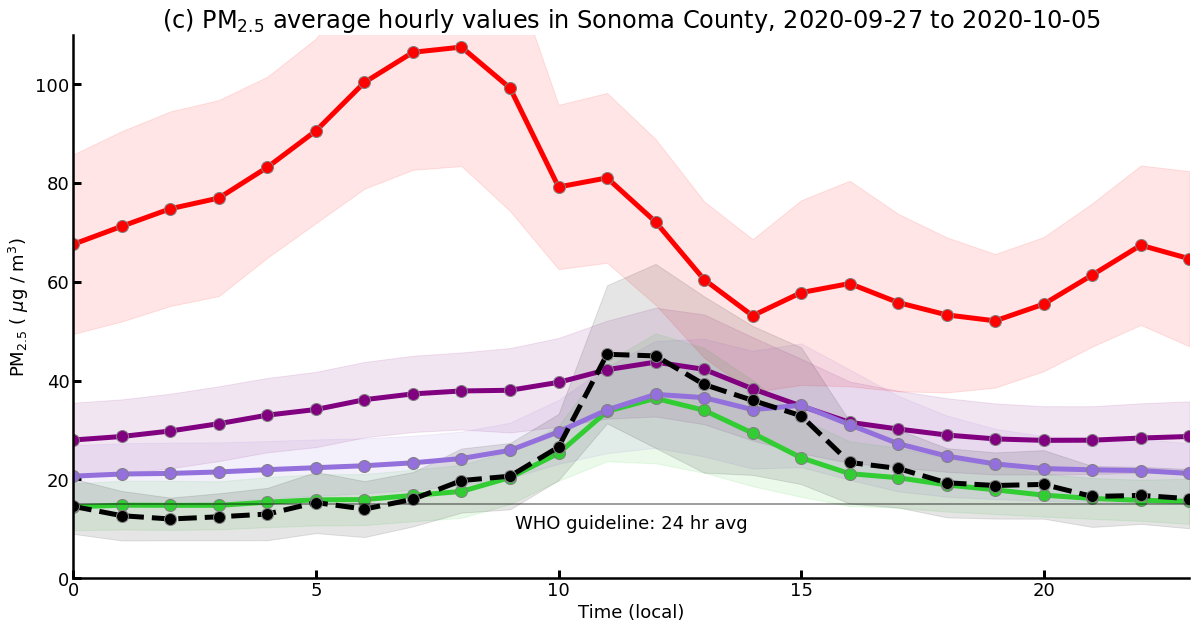

In [27]:
plt.figure(figsize=(20,10))
ax = plt.axes()

#----------------------------------------------------
# Plot setup

# PurpleAir Sonoma
plt.plot(PA_allstation_diurnal.index, PA_allstation_diurnal, '-o', label='PurpleAir Sonoma County average',
         color='purple',
         markersize=12, linewidth=5,
         markerfacecolor='purple',
         markeredgecolor='grey',
         markeredgewidth=1)
plt.fill_between(PA_allstation_diurnal.index, PA_allstation_diurnal[0]-PA_allstation_diurnal_se[0], 
                 PA_allstation_diurnal[0]+PA_allstation_diurnal_se[0], 
                 alpha=0.1, edgecolor='purple', facecolor='purple')

# PurpleAir Sebastopol
plt.plot(PA_Sebastopol_diurnal.index, PA_Sebastopol_diurnal, '-o', label='PurpleAir within 0.5 degrees of Sebastopol',
         color='limegreen',
         markersize=12, linewidth=5,
         markerfacecolor='limegreen',
         markeredgecolor='grey',
         markeredgewidth=1)
plt.fill_between(PA_Sebastopol_diurnal.index, PA_Sebastopol_diurnal-PA_Sebastopol_diurnal_se, 
                 PA_Sebastopol_diurnal+PA_Sebastopol_diurnal_se, 
                 alpha=0.1, edgecolor='limegreen', facecolor='limegreen')


# PurpleAir LNU Ag
plt.plot(PA_LNU_diurnal.index, PA_LNU_diurnal, '-o', label='PurpleAir within the LNU Ag Pass region',
         color='mediumpurple',
         markersize=12, linewidth=5,
         markerfacecolor='mediumpurple',
         markeredgecolor='grey',
         markeredgewidth=1)
plt.fill_between(PA_LNU_diurnal.index, PA_LNU_diurnal-PA_LNU_diurnal_se, 
                 PA_LNU_diurnal+PA_LNU_diurnal_se, 
                 alpha=0.1, edgecolor='mediumpurple', facecolor='mediumpurple')

# PurpleAir GLASS Ag
plt.plot(PA_Glass_diurnal.index, PA_Glass_diurnal, '-o', label='PurpleAir within the Glass Ag Pass region',
         color='red',
         markersize=12, linewidth=5,
         markerfacecolor='red',
         markeredgecolor='grey',
         markeredgewidth=1)
plt.fill_between(PA_Glass_diurnal.index, PA_Glass_diurnal-PA_Glass_diurnal_se, 
                 PA_Glass_diurnal+PA_Glass_diurnal_se, 
                 alpha=0.1, edgecolor='red', facecolor='red')


# AirNow Sebastopol
plt.plot(Sebastopol_diurnal.index, Sebastopol_diurnal['PM2.5'], '--o', label='Airnow Sebastopol',
         color='black',
         markersize=12, linewidth=5,
         markerfacecolor='black',
         markeredgecolor='grey',
         markeredgewidth=1)
plt.fill_between(Sebastopol_diurnal.index, Sebastopol_diurnal['PM2.5']-Sebastopol_diurnal_se['PM2.5'], 
                 Sebastopol_diurnal['PM2.5']+Sebastopol_diurnal_se['PM2.5'], 
                 alpha=0.1, edgecolor='black', facecolor='black')

#----------------------------------------------------
# Formatting

# axes format
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax.set_xlim(0,23)
ax.set_ylim(0, 110)
#plt.yticks(np.arange(0, 50, step=20), fontsize=18)

# tickmarks direction
ax.tick_params(direction='in', length=8, width=3)

# WHO limit
ax.axhline(y=15, alpha=0.5, color='black')
plt.text(0.50, 0.10, 'WHO guideline: 24 hr avg', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes, fontsize=18, color='black')

# adjust border
ax.spines["left"].set_linewidth(2.5)
ax.spines["bottom"].set_linewidth(2.5)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

# titles
plt.title('(c) PM$_{2.5}$ average hourly values in Sonoma County, '+t1+' to '+ t2,fontsize=24)
plt.xlabel('Time (local)',fontsize=18)
plt.ylabel('PM$_{2.5}$ ( $\mu$g / m$^3$)',fontsize=18)

# legend
#plt.legend(bbox_to_anchor=(0.98, 0.72),fontsize=14,loc='lower right')

#plt.show() 
plt.savefig('Diurnal.png')